In [6]:
# Install necessary packages if not already installed
# !pip install tensorflow pandas scikit-learn

import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Input


In [7]:
# Load the CSV data
data = pd.read_csv('boston_housing.csv')  # Replace this with the correct path to your CSV file

In [9]:
# Inspect the dataset
print(data.head())  # View the first 5 rows of the dataset

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [13]:
# Separate features and target variable
X = data.drop(columns=['MEDV'])  # 'MEDV' is the target column
y = data['MEDV']

In [15]:
# Normalize the feature data using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [19]:
# Build the model
model = tf.keras.Sequential([
    Input(shape=(X_train.shape[1],)),  # Explicitly define the input shape
    tf.keras.layers.Dense(units=64, activation='relu', name='Dense_1'),
    tf.keras.layers.Dense(units=64, activation='relu', name='Dense_2'),
    tf.keras.layers.Dense(units=1, activation='linear', name='Prediction')  # Linear activation for regression
])

In [21]:
# Compile the model
model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mse']
)

In [23]:
# Train the model
history = model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=50,
    validation_data=(X_val, y_val)
)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 468.8779 - mse: 468.8779 - val_loss: 183.6112 - val_mse: 183.6112
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 178.8595 - mse: 178.8595 - val_loss: 71.2399 - val_mse: 71.2399
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 80.0842 - mse: 80.0842 - val_loss: 56.0312 - val_mse: 56.0312
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 58.5922 - mse: 58.5922 - val_loss: 48.1379 - val_mse: 48.1379
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 50.9123 - mse: 50.9123 - val_loss: 43.0920 - val_mse: 43.0920
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 43.2895 - mse: 43.2895 - val_loss: 38.6623 - val_mse: 38.6623
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 36.6266 - mse: 36.6266 - val_loss: 34.3269 - val_mse: 34.3269
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 29.3168 - mse: 29.3168 - val_loss: 30.3031 - val_mse: 30.3031
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━

In [25]:
# Evaluate the model on test data
loss, mse = model.evaluate(X_test, y_test, batch_size=32)
print(f"Test set loss: {loss:.4f}")
print(f"Test set MSE: {mse:.4f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.8506 - mse: 5.8506
Test set loss: 5.6950
Test set MSE: 5.6950


In [27]:
# Make predictions
y_pred = model.predict(X_test)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [29]:
# Example of predicted and true values (showing the first 10 values)
for true, pred in zip(y_test[:10], y_pred[:10]):
    print(f"True value: {true}, Predicted value: {pred[0]}")

True value: 23.1, Predicted value: 20.360212326049805
True value: 24.8, Predicted value: 23.623458862304688
True value: 31.5, Predicted value: 32.486488342285156
True value: 24.2, Predicted value: 24.812007904052734
True value: 50.0, Predicted value: 51.13844680786133
True value: 19.7, Predicted value: 15.643013954162598
True value: 23.2, Predicted value: 23.10540771484375
True value: 15.1, Predicted value: 16.05817985534668
True value: 21.5, Predicted value: 20.760313034057617
True value: 23.6, Predicted value: 25.108322143554688


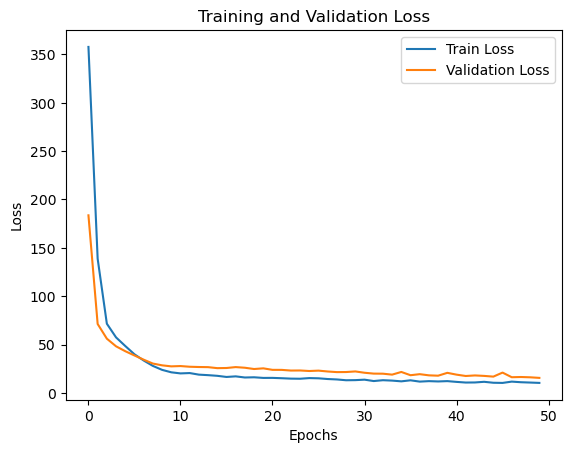

In [33]:
# Optional: Plot the training history (loss curve)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
# Functions to plot images and prediction arrays
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img.squeeze(), cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array):2.0f}% ({class_names[true_label]})",
               color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [ ]:
# Plot a few test images with predictions
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
# Predict a single image
# Grab an image from the test dataset
img = test_images[1]

In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

In [ ]:
# Predict the label
predictions_single = probability_model.predict(img)

In [ ]:
# Plot prediction array
plot_value_array(0, predictions_single[0], [test_labels[1]])
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [ ]:
# Print predicted label
print("Predicted label:", class_names[np.argmax(predictions_single[0])])
print("True label:", class_names[test_labels[1]])